In [86]:
import model_loader
import pipeline
from PIL import Image
import torch
from transformers import CLIPTokenizer


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")

model_file = "../data/v1-5-pruned-emaonly.ckpt"

models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

#text2img
prompt = "very cute dog, wearing sunglasses, sunny day"
uncond_prompt = "" # negative prompt
do_cfg = True
cfg_scale = 7.5

# img2img
input_image = None
image_path = "../images/cogi.jpg"
input_image = Image.open(image_path)

strength = 1.0

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    input_image=input_image,
    sampler_name="ddpm",
    n_inference_steps=num_inference_steps,
    strength=strength,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

100%|██████████| 50/50 [00:03<00:00, 12.62it/s]


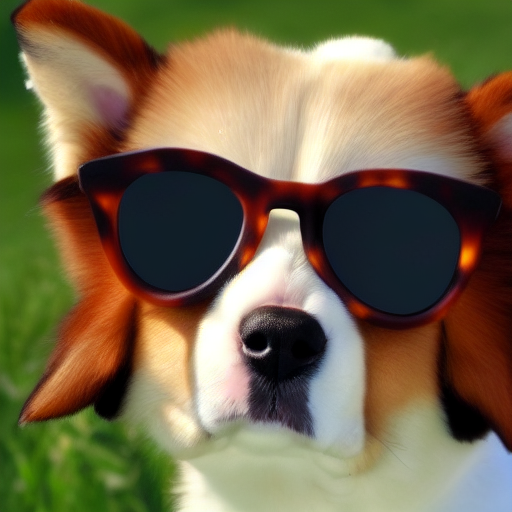

In [87]:
Image.fromarray(output_image).show()